In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
#Reading the dataset
df = pd.read_csv("sales_data.csv")
df.head()

Order Date  Order ID                   Product   Product_ean  \
0  2019-01-22 21:25:00    141234                    iPhone  5.638009e+12   
1  2019-01-28 14:15:00    141235  Lightning Charging Cable  5.563320e+12   
2  2019-01-17 13:33:00    141236          Wired Headphones  2.113973e+12   
3  2019-01-05 20:33:00    141237          27in FHD Monitor  3.069157e+12   
4  2019-01-25 11:59:00    141238          Wired Headphones  9.692681e+12   

      catégorie                       Purchase Address  Quantity Ordered  \
0     Vêtements        944 Walnut St, Boston, MA 02215                 1   
1  Alimentation       185 Maple St, Portland, OR 97035                 1   
2     Vêtements  538 Adams St, San Francisco, CA 94016                 2   
3        Sports     738 10th St, Los Angeles, CA 90001                 1   
4  Électronique          387 10th St, Austin, TX 73301                 1   

   Price Each  Cost price  turnover    margin  
0      700.00    231.0000    700.00  469.0000  
1       14.95      7.4750     14.95    7.4750  
2       11.99      5.9950     23.98   11.9900  
3      149.99     97.4935    149.99   52.4965  
4       11.99      5.9950     11.99    5.9950

#1. Data Cleaning and Preprocessing:

**Objective**: </br>Ensure the data is clean and structured for analysis.</br></br>
*Tasks*:<br/>

Remove duplicate rows if any.</br>
Handle missing values.</br>
Correct column names with special characters or encoding issues (e.g., "catÃ©gorie" should be "categorie").</br>
Convert data types if needed (e.g., Order Date to a datetime format).</br>
Ensure consistent formatting (e.g., Product names, addresses).</br>

In [3]:
# Check for duplicate rows
duplicates = df.duplicated()

In [4]:
# Remove duplicate rows
df = df[~duplicates]

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

In [6]:
missing_values

Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

in our data, there are no missing values

In [7]:
# Rename columns with special characters
df = df.rename(columns={'catÃ©gorie': 'categorie'})

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 17.0+ MB


In [9]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d %H:%M:%S')

# Convert a column to numeric (e.g., Product_ean)
df['Product_ean'] = pd.to_numeric(df['Product_ean'], errors='coerce')


In [10]:
# Replace special characters in text columns
df['Product'] = df['Product'].str.replace('Ã©', 'e')

# Convert text to uppercase or lowercase for consistency
df['Product'] = df['Product'].str.upper()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order Date        185950 non-null  datetime64[ns]
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Product_ean       185950 non-null  float64       
 4   catégorie         185950 non-null  object        
 5   Purchase Address  185950 non-null  object        
 6   Quantity Ordered  185950 non-null  int64         
 7   Price Each        185950 non-null  float64       
 8   Cost price        185950 non-null  float64       
 9   turnover          185950 non-null  float64       
 10  margin            185950 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 17.0+ MB


#Exploratory Data Analysis (EDA):</br>

**Objective:**</br>
 Gain insights and understand the data.</br>
*Tasks*:</br>
* Summary statistics (mean, median, std. deviation).<br/>
* Data visualization (histograms, scatter plots, box plots).</br>
* Identify trends, outliers, and correlations among variables.</br>
* Understand the distribution of products, categories, and locations.

In [12]:
#Summarry Statistics
df.describe()

Order ID   Product_ean  Quantity Ordered     Price Each  \
count  185950.000000  1.859500e+05     185950.000000  185950.000000   
mean   230417.569379  5.509211e+12          1.124383     184.399735   
std     51512.737110  2.598403e+12          0.442793     332.731330   
min    141234.000000  1.000083e+12          1.000000       2.990000   
25%    185831.250000  3.254280e+12          1.000000      11.950000   
50%    230367.500000  5.511235e+12          1.000000      14.950000   
75%    275035.750000  7.765195e+12          1.000000     150.000000   
max    319670.000000  9.999983e+12          9.000000    1700.000000   

          Cost price       turnover         margin  
count  185950.000000  185950.000000  185950.000000  
mean       69.668583     185.490917     115.289422  
std       109.424191     332.919771     225.227190  
min         1.495000       2.990000       1.495000  
25%         5.975000      11.950000       5.975000  
50%         7.475000      14.950000       7.475000  
75%        97.500000     150.000000      52.500000  
max       561.000000    3400.000000    2278.000000

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Order ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Product_ean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Quantity Ordered'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Price Each'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Order ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Product_ean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Quantity Ordered'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Price Each'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Order ID', 'Product_ean'], ['Product_ean', 'Quantity Ordered'], ['Quantity Ordered', 'Price Each'], ['Price Each', 'Cost price']]], **{})
chart

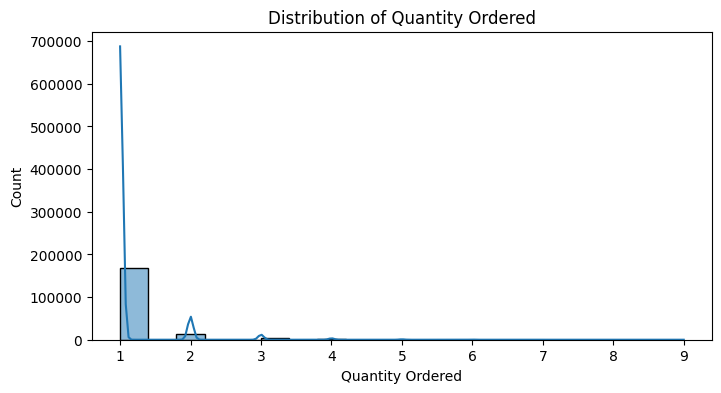

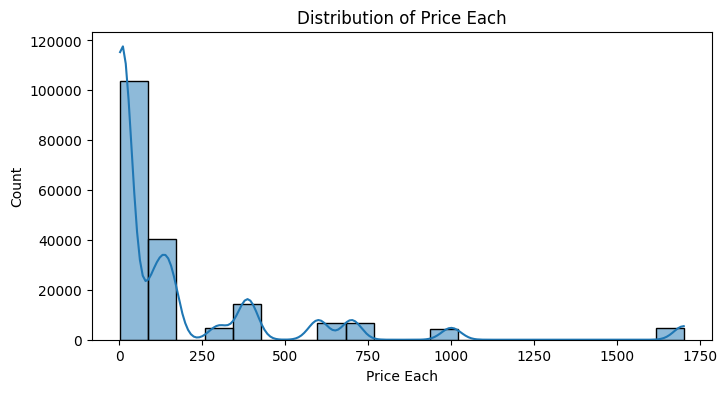

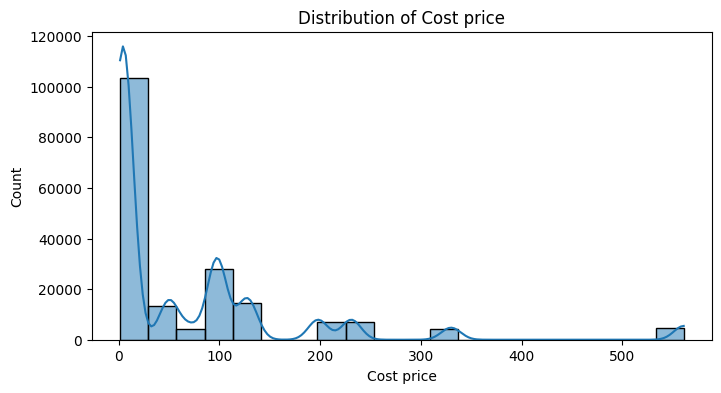

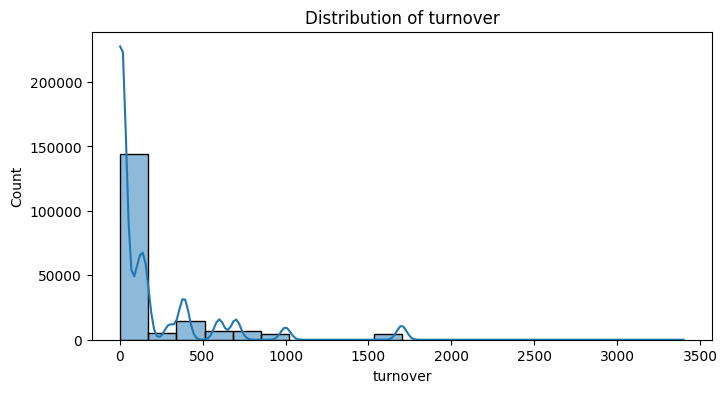

In [13]:
# histograms for numerical columns
numerical_cols = ['Quantity Ordered', 'Price Each', 'Cost price', 'turnover', 'margin']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [14]:
# pairwise relationships between numerical columns
sns.pairplot(df[numerical_cols])
plt.show()

In [15]:
#Product Analysis
product_sales = df.groupby('Product')['Quantity Ordered', 'turnover'].sum().reset_index()
product_sales = product_sales.sort_values(by='Quantity Ordered', ascending=False)

#Category Analysis
category_sales = df.groupby('catégorie')['turnover', 'margin'].sum().reset_index()
category_sales = category_sales.sort_values(by='turnover', ascending=False)

#Location Analysis
location_sales = df.groupby('Purchase Address')['turnover'].sum().reset_index()
location_sales = location_sales.sort_values(by='turnover', ascending=False)

#Time Series Analysis
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y %H:%M')
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['turnover'].sum()



<ipython-input-15-824599d16584>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  product_sales = df.groupby('Product')['Quantity Ordered', 'turnover'].sum().reset_index()
<ipython-input-15-824599d16584>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_sales = df.groupby('catégorie')['turnover', 'margin'].sum().reset_index()


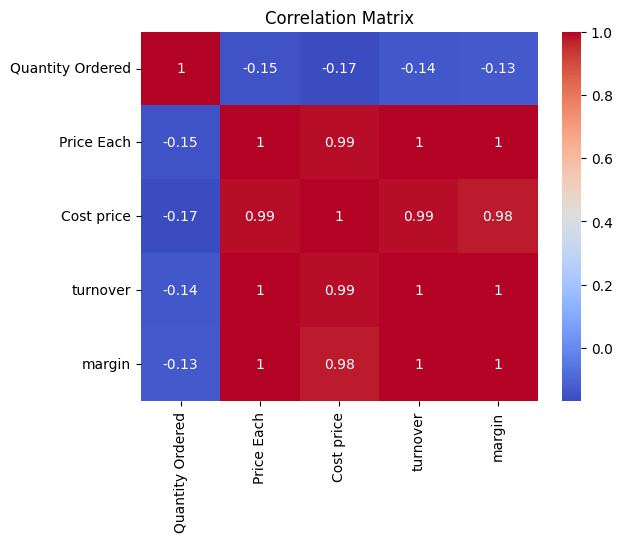

In [16]:
#Correlation Analysis
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
summary_stats = df.describe()
# Display results
print("Summary Statistics:")
print(summary_stats)
print("\nTop Selling Products:")
print(product_sales.head())
print("\nCategory Analysis:")
print(category_sales)
print("\nTop Performing Locations:")
print(location_sales.head())
print("\nMonthly Sales:")
print(monthly_sales)

Summary Statistics:
            Order ID   Product_ean  Quantity Ordered     Price Each  \
count  185950.000000  1.859500e+05     185950.000000  185950.000000   
mean   230417.569379  5.509211e+12          1.124383     184.399735   
std     51512.737110  2.598403e+12          0.442793     332.731330   
min    141234.000000  1.000083e+12          1.000000       2.990000   
25%    185831.250000  3.254280e+12          1.000000      11.950000   
50%    230367.500000  5.511235e+12          1.000000      14.950000   
75%    275035.750000  7.765195e+12          1.000000     150.000000   
max    319670.000000  9.999983e+12          9.000000    1700.000000   

          Cost price       turnover         margin          Month  
count  185950.000000  185950.000000  185950.000000  185950.000000  
mean       69.668583     185.490917     115.289422       7.059140  
std       109.424191     332.919771     225.227190       3.502996  
min         1.495000       2.990000       1.495000       1.000000  


In [18]:
#Top product categories
fig = px.pie(category_sales, names='catégorie', values='turnover', title='Top Product Categories')
fig.show()

In [19]:
#Top selling products
fig = px.bar(product_sales.head(10), x='Product', y='Quantity Ordered', title='Top Selling Products')
fig.show()

In [20]:
import plotly.express as px

# Monthly Sales Analysis
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df['Month'] = df['Month'].map(month_names)

fig = px.line(monthly_sales.reset_index(), x='Month', y='turnover', title='Monthly Sales Trend')

# Customize x-axis labels
fig.update_xaxes(tickmode='array', tickvals=list(month_names.keys()), ticktext=list(month_names.values()))

fig.show()


In [21]:
#Top product categories
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales.head(10), x='turnover', y='catégorie')
plt.title('Top Product Categories')
plt.xlabel('Turnover')
plt.ylabel('Category')
plt.show()

# Feature Engineering:

**Objective**: </br>Create relevant features for analysis.</br>
*Tasks*:
* Extract additional information from Order Date (e.g., month, day, day of the week).</br>
* Calculate profit (turnover - cost price).</br>
* Create new columns if needed, such as city or state from the Purchase Address.</br>
* Group products into broader categories if necessary.

In [22]:
#Group Products into Broader Categories
product_category_mapping = {
    'iPhone': 'Electronics',
    'Lightning Charging Cable': 'Accessories',
    'Wired Headphones': 'Accessories',
    '27in FHD Monitor': 'Electronics',
    'AAA Batteries (4-pack)': 'Batteries',
    '27in 4K Gaming Monitor': 'Electronics',
    # Add more mappings as needed
}
df['Product Category'] = df['Product'].map(product_category_mapping)


In [23]:
#New Columns for City and State
# Assuming 'Purchase Address' contains city and state information
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split()[0])

#Profit Calculation
df['Profit'] = df['turnover'] - df['Cost price']


df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Day of Week'] = df['Order Date'].dt.dayofweek


In [24]:
#Total Turnover, Margin, and Profit

total_turnover = df['turnover'].sum()
total_margin = df['margin'].sum()
total_profit = df['Profit'].sum()

#Best-Selling Products or Categories:

best_selling_products = df.groupby('Product')['Quantity Ordered'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by='Quantity Ordered', ascending=False)

best_selling_categories = df.groupby('Product Category')['Quantity Ordered'].sum().reset_index()
best_selling_categories = best_selling_categories.sort_values(by='Quantity Ordered', ascending=False)

#City or State with Highest Sales
city_with_highest_sales = df.groupby('City')['turnover'].sum().idxmax()
state_with_highest_sales = df.groupby('State')['turnover'].sum().idxmax()



In [25]:
#Relationship Between Price and Quantity Ordered

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['Price Each'], df['Quantity Ordered'], alpha=0.5)
plt.title('Relationship Between Price and Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.show()


In [26]:
#Sales by Location
fig = px.scatter_geo(df, locations="State", locationmode='USA-states', color="turnover",
                     hover_name="State", title="Sales by State")
fig.show()

In [27]:
#Time Series Data to Visualize Trends Over Time
monthly_turnover = df.groupby(df['Order Date'].dt.to_period('M'))['turnover'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_turnover.index.to_timestamp(), monthly_turnover.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Turnover')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Predictive Modeling
**Objective**: </br>
Make future predictions or recommendations.</br>
*Tasks*:</br>
* Build predictive models (e.g., regression, time series forecasting) to predict sales or demand.</br>
* Use machine learning algorithms to segment customers or products for targeted marketing.

# **Sales Prediction**

**Linear Regression**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features (X) and target (y)
X = df[['Quantity Ordered', 'Price Each', 'Day of Week']]
y = df['turnover']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 216.21968090201872
R-squared: 0.9980528294882742


This model is predicting 'turnover' based on the provided features ('Quantity Ordered', 'Price Each', 'Day of Week'). The Mean Squared Error and R-squared are used to assess how well the model's predictions align with the actual 'turnover' values in the testing set, providing insights into the model's predictive performance.

In [30]:
pip install joblib

In [29]:
from sklearn.externals import joblib

# Load the trained model from a file (replace 'model_file.pkl' with your model file path)
model = joblib.load('model_file.pkl')


ImportError: ignored